<a href="https://www.kaggle.com/code/rinichristy/dimensionality-reduction-using-pca?scriptVersionId=90978726" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Principal Component Analysis (PCA) of UCI Wine dataset**

## **Data Set Information:**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. )OD280/OD315 of diluted wines
13. Proline


## **Part 1: Data Preprocessing**

### **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Importing the dataset**

In [2]:
df = pd.read_csv('../input/data-ml-superdatascience/data_ml_superdatascience/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

### **Splitting the dataset into the Training set and Test set**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Part 2: Building the Classification Models**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

### **Training the Classification models on the Train set**

In [9]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### **Predicting the Test set results**

In [10]:
y_pred_LR = clf1.predict(X_test)
y_pred_KNN = clf2.predict(X_test)
y_pred_SVC = clf3.predict(X_test)
y_pred_NB = clf4.predict(X_test)
y_pred_DTC = clf5.predict(X_test)
y_pred_RFC = clf6.predict(X_test)

### **KEY PERFORMANCE INDICATORS (KPI)**

#### **Generating the Confusion Matrix and Classification report**

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression Model is ', accuracy_score(y_test, y_pred_LR))
print('\n','Confusion Matrix of Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred_LR))
print('\n', '\n','Classification Report for Logistic Regression Model:' '\n',classification_report(y_test, y_pred_LR))
print('\n','\n','Accuracy of K-Nearest Neighbor Model is ', accuracy_score(y_test, y_pred_KNN))
print('\n','Confusion Matrix of K-Nearest Neighbor Model:' '\n', confusion_matrix(y_test, y_pred_KNN))
print('\n', '\n','Classification Report for K-Nearest Neighbor Model:' '\n',classification_report(y_test, y_pred_KNN))
print('\n','\n', 'Accuracy of Support Vector Classification Model is ', accuracy_score(y_test, y_pred_SVC))
print('\n','Confusion Matrix of Support Vector Classification Model:' '\n', confusion_matrix(y_test, y_pred_SVC))
print('\n', '\n','Classification Report for Support Vector Classification Model:' '\n',classification_report(y_test, y_pred_SVC))
print('\n','\n', 'Accuracy of Naive Bayes Classification  Model is ', accuracy_score(y_test, y_pred_NB))
print('\n','Confusion Matrix of Naive Bayes Classification  Model:' '\n', confusion_matrix(y_test, y_pred_NB))
print('\n', '\n','Classification Report for Naive Bayes Classification  Model:' '\n',classification_report(y_test, y_pred_NB))
print('\n','\n', 'Accuracy of Decision Tree Model is ', accuracy_score(y_test, y_pred_DTC))
print('\n','Confusion Matrix of Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DTC))
print('\n', '\n','Classification Report for Decision Tree Model:' '\n',classification_report(y_test, y_pred_DTC))
print('\n','\n', 'Accuracy of Random Forest Model is ', accuracy_score(y_test, y_pred_RFC))
print('\n','Confusion Matrix of  Random Forest Model:' '\n', confusion_matrix(y_test, y_pred_RFC))
print('\n', '\n','Classification Report for  Random Forest Model:' '\n',classification_report(y_test, y_pred_RFC))

Accuracy of Logistic Regression Model is  1.0

 Confusion Matrix of Logistic Regression Model:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]

 
 Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 
 Accuracy of K-Nearest Neighbor Model is  0.9722222222222222

 Confusion Matrix of K-Nearest Neighbor Model:
 [[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]

 
 Classification Report for K-Nearest Neighbor Model:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

   

## **Part 3: Applying PCA**

In [12]:
X_train

array([[ 0.87668336,  0.79842885,  0.64412971, ...,  0.0290166 ,
        -1.06412236, -0.2059076 ],
       [-0.36659076, -0.7581304 , -0.39779858, ...,  0.0290166 ,
        -0.73083231, -0.81704676],
       [-1.69689407, -0.34424759, -0.32337513, ...,  0.90197362,
         0.51900537, -1.31256499],
       ...,
       [-0.70227477, -0.68615078, -0.65828065, ...,  0.46549511,
         0.51900537, -1.31256499],
       [ 1.13777093, -0.62316862, -0.91876272, ..., -0.18922266,
         1.03282752,  0.80164614],
       [ 1.4610222 ,  0.12361993,  0.42085937, ..., -1.45501034,
        -1.2168803 , -0.2719767 ]])

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance 

array([0.36884109, 0.19318394])

In [14]:
X_train[0:5]

array([[-2.17884511, -1.07218467],
       [-1.80819239,  1.57822344],
       [ 1.09829474,  2.22124345],
       [-2.55584748, -1.66210369],
       [ 1.85698063,  0.24157317]])

## **Part 4: Training the Classification model on the Principal Component Training set**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
# Predicting the Test set results
y_pred_LR = clf1.predict(X_test)
y_pred_KNN = clf2.predict(X_test)
y_pred_SVC = clf3.predict(X_test)
y_pred_NB = clf4.predict(X_test)
y_pred_DTC = clf5.predict(X_test)
y_pred_RFC = clf6.predict(X_test)

### **KEY PERFORMANCE INDICATORS (KPI)**

### **Generating the Confusion Matrix and Classification report**

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression Model is ', accuracy_score(y_test, y_pred_LR))
print('\n','Confusion Matrix of Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred_LR))
print('\n', '\n','Classification Report for Logistic Regression Model:' '\n',classification_report(y_test, y_pred_LR))
print('\n','\n','Accuracy of K-Nearest Neighbor Model is ', accuracy_score(y_test, y_pred_KNN))
print('\n','Confusion Matrix of K-Nearest Neighbor Model:' '\n', confusion_matrix(y_test, y_pred_KNN))
print('\n', '\n','Classification Report for K-Nearest Neighbor Model:' '\n',classification_report(y_test, y_pred_KNN))
print('\n','\n', 'Accuracy of Support Vector Classification Model is ', accuracy_score(y_test, y_pred_SVC))
print('\n','Confusion Matrix of Support Vector Classification Model:' '\n', confusion_matrix(y_test, y_pred_SVC))
print('\n', '\n','Classification Report for Support Vector Classification Model:' '\n',classification_report(y_test, y_pred_SVC))
print('\n','\n', 'Accuracy of Naive Bayes Classification  Model is ', accuracy_score(y_test, y_pred_NB))
print('\n','Confusion Matrix of Naive Bayes Classification  Model:' '\n', confusion_matrix(y_test, y_pred_NB))
print('\n', '\n','Classification Report for Naive Bayes Classification  Model:' '\n',classification_report(y_test, y_pred_NB))
print('\n','\n', 'Accuracy of Decision Tree Model is ', accuracy_score(y_test, y_pred_DTC))
print('\n','Confusion Matrix of Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DTC))
print('\n', '\n','Classification Report for Decision Tree Model:' '\n',classification_report(y_test, y_pred_DTC))
print('\n','\n', 'Accuracy of Random Forest Model is ', accuracy_score(y_test, y_pred_RFC))
print('\n','Confusion Matrix of  Random Forest Model:' '\n', confusion_matrix(y_test, y_pred_RFC))
print('\n', '\n','Classification Report for  Random Forest Model:' '\n',classification_report(y_test, y_pred_RFC))

Accuracy of Logistic Regression Model is  0.9722222222222222

 Confusion Matrix of Logistic Regression Model:
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

 
 Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36


 
 Accuracy of K-Nearest Neighbor Model is  0.9722222222222222

 Confusion Matrix of K-Nearest Neighbor Model:
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

 
 Classification Report for K-Nearest Neighbor Model:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00

## **Part 5: Visualization**

### **Visualizing the Train set results**

#### **Using gridspec**

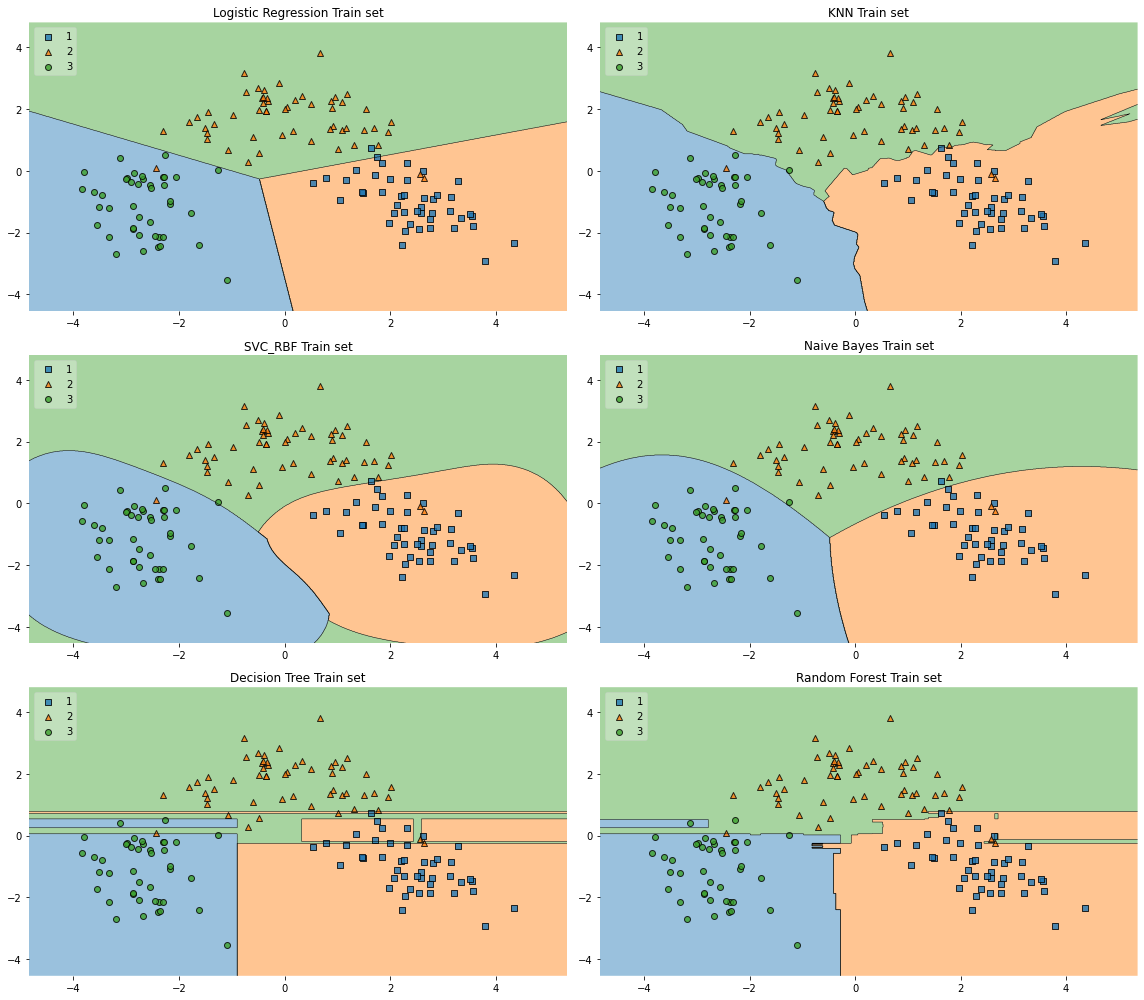

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(16,14))
 
labels = ['Logistic Regression Train set', 'KNN Train set', 'SVC_RBF Train set','Naive Bayes Train set', 'Decision Tree Train set', 'Random Forest Train set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]): 
 
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)
 
plt.tight_layout();

#### **ListedColormap**

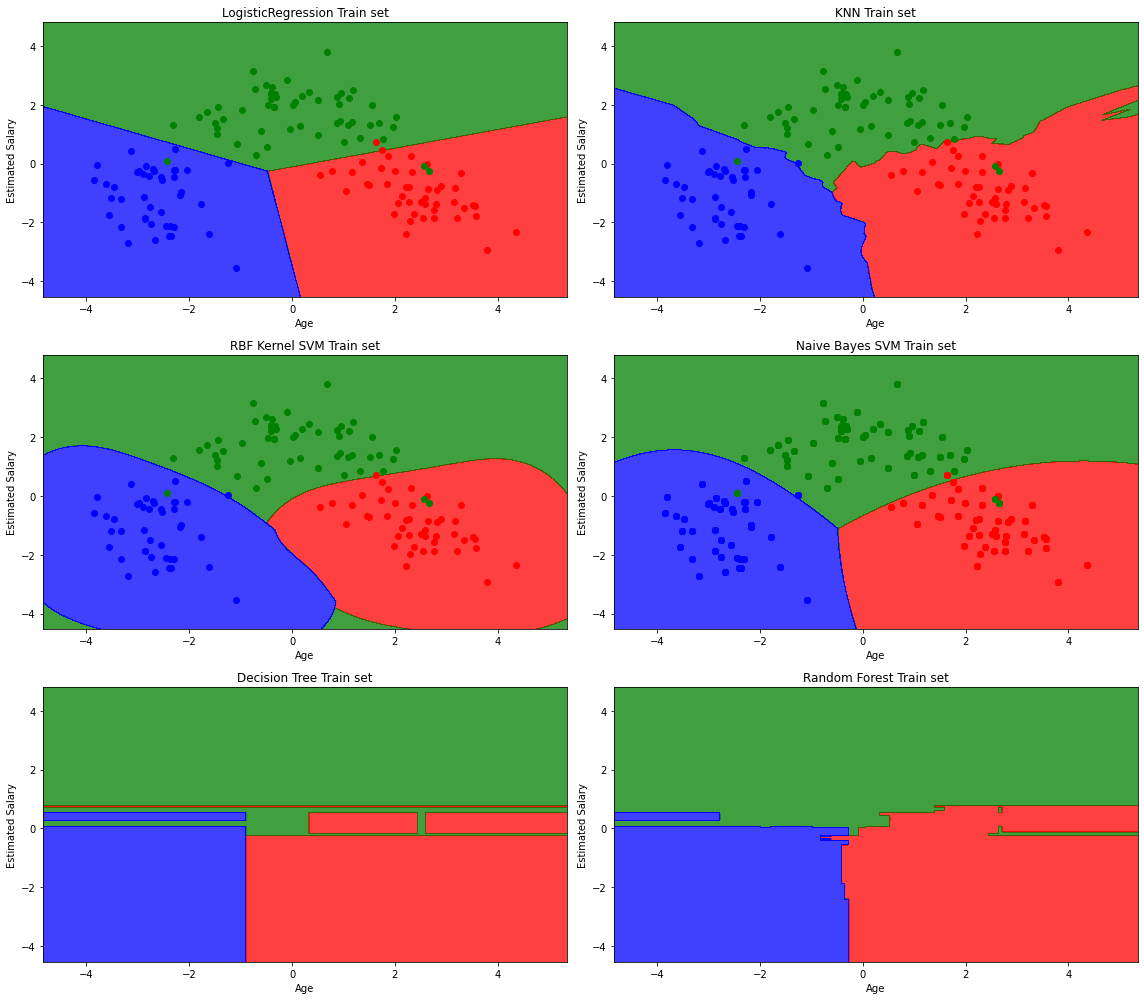

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4), (axes5, axes6)) = plt.subplots(3, 2, figsize=(16,14))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes1.set_title('LogisticRegression Train set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes2.set_title('KNN Train set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes3.set_title('RBF Kernel SVM Train set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes4.set_title('Naive Bayes SVM Train set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')

axes5.contourf(X1, X2, clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes5.set_xlim(X1.min(), X1.max())
axes5.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes5.set_title('Decision Tree Train set')
axes5.set_xlabel('Age')
axes5.set_ylabel('Estimated Salary')

axes6.contourf(X1, X2, clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes6.set_xlim(X1.min(), X1.max())
axes6.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes6.set_title('Random Forest Train set')
axes6.set_xlabel('Age')
axes6.set_ylabel('Estimated Salary')
plt.tight_layout();

### **Visualizing the Test set results**

#### **Using gridspec**

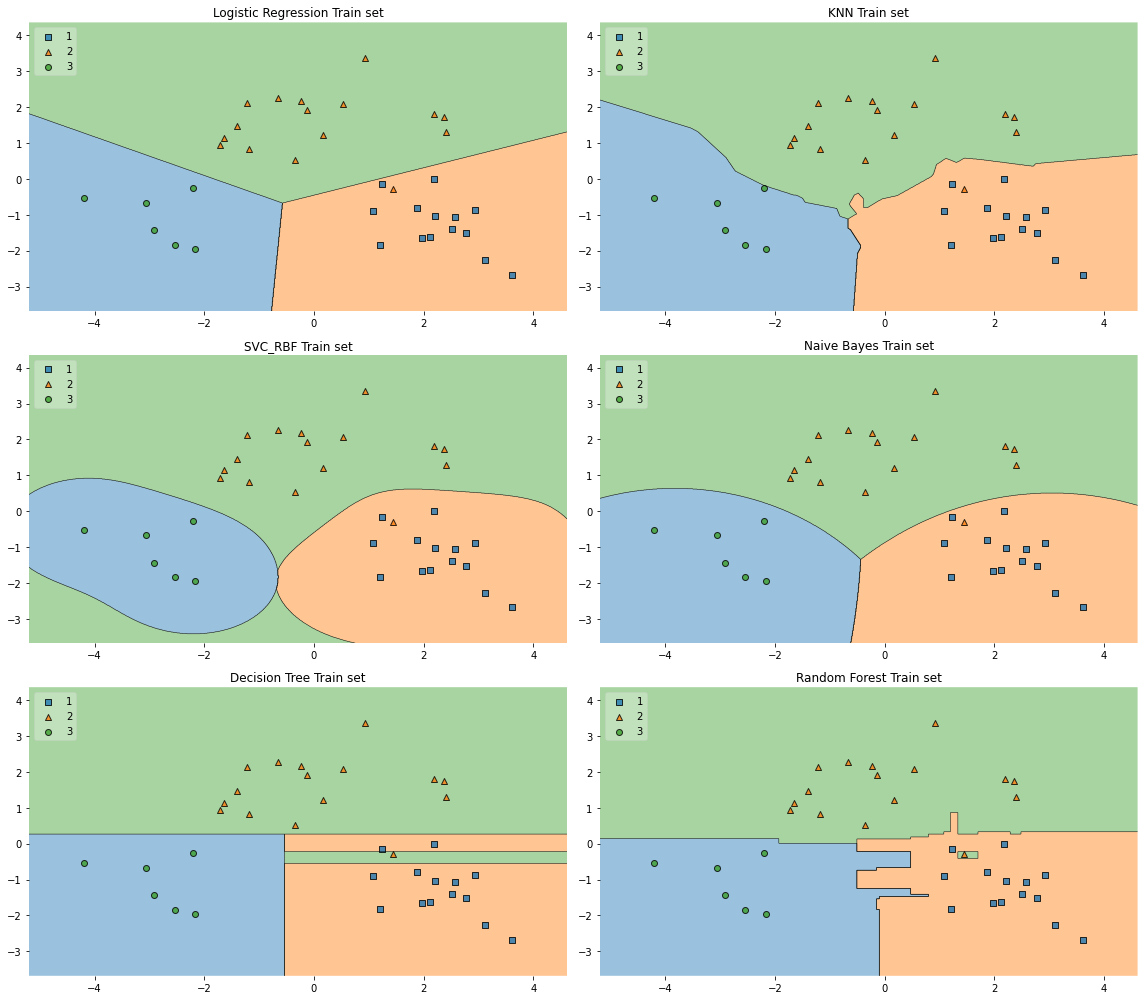

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(16,14))
 
labels = ['Logistic Regression Train set', 'KNN Train set', 'SVC_RBF Train set','Naive Bayes Train set', 'Decision Tree Train set', 'Random Forest Train set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]): 
 
    clf.fit(X_test, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
 
plt.tight_layout();

#### **ListedColormap**

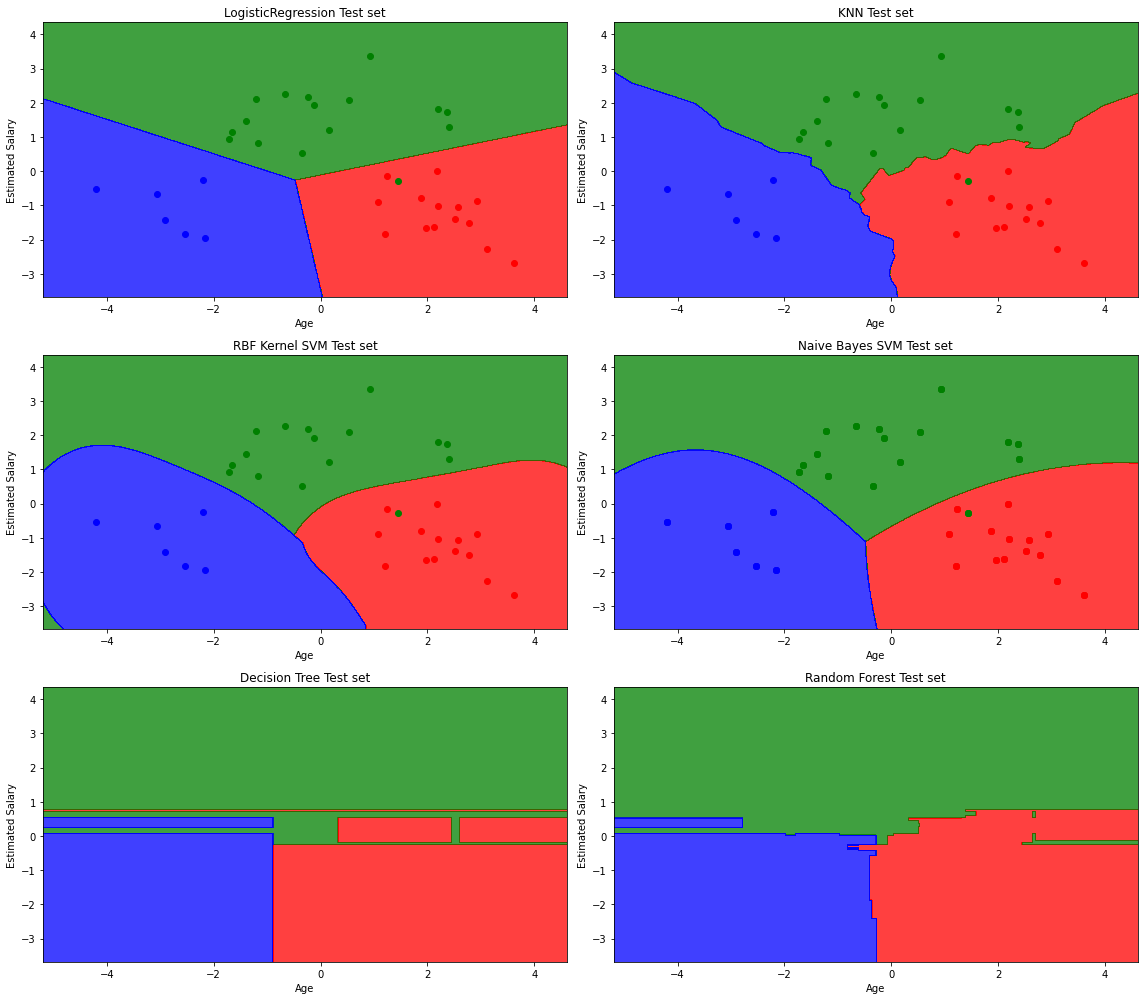

In [20]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4), (axes5, axes6)) = plt.subplots(3, 2, figsize=(16,14))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes1.set_title('LogisticRegression Test set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes2.set_title('KNN Test set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes3.set_title('RBF Kernel SVM Test set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes4.set_title('Naive Bayes SVM Test set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')

axes5.contourf(X1, X2, clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes5.set_xlim(X1.min(), X1.max())
axes5.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes5.set_title('Decision Tree Test set')
axes5.set_xlabel('Age')
axes5.set_ylabel('Estimated Salary')

axes6.contourf(X1, X2, clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes6.set_xlim(X1.min(), X1.max())
axes6.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes6.set_title('Random Forest Test set')
axes6.set_xlabel('Age')
axes6.set_ylabel('Estimated Salary')
plt.tight_layout();